# Wrangle & Analyze "WeRateDogs" Data



![caption](files/dogs.PNG)


# Project 5: Data Wrangling by Abdishakur Y. Yoonis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gathering data</a></li>
<li><a href="#assess">Assessing data</a></li>
<li><a href="#clean">Cleaning data</a></li>

<li><a href="#analysis">Storing, Analyzing, and Visualizing Data</a></li>
    <ul>
        <li><a href="#insight1">Insight 1</a></li>
        <li><a href="#insight2">Insight 2</a></li>
        <li><a href="#insight3">Insight 3</a></li>
        <li><a href="#insight4">Insight 4</a></li>
        <li><a href="#insight5">Insight 5</a></li>
    </ul>
</ul>


<a id='intro'></a>
## Introduction



The main goal of this project is to demonstrate the data wrangling abilities and skills those we learnt as part of the Udacity Data Analysis Nanodegree program.

In this data wrangling project I will gather, assess and clean twitter posts from Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. This project will download 5000+ of their tweets as they stood on August 1, 2017.


<a id='gather'></a>
## Gathering data

**1. Twitter archive file**

The file "twitter_archive_enhanced.csv" downloaded manually from Udacity resources    

In [1]:
# import all essential packages required
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from functools import reduce
from datetime import datetime
import matplotlib.dates as mdates
import os
import tweepy 
import json 
import re
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

# pandas settings
pd.set_option('display.max_colwidth', -1)
sns.set_style('darkgrid')


In [2]:
# loading twitter archive
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
# applying tweet id column as index
twitter_archive.set_index("tweet_id", inplace = True)

In [3]:
# viewing few lines
twitter_archive.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [4]:
# Information about the dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

**2. Tweet image prediction**

**The tweet image predictions**:
i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [5]:
# This URL was downloaded programatically 
# obtaining file with the image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

# loading image predictions
image_prediction = pd.read_csv('image-predictions.tsv', sep = '\t')
# using tweet id column as index
image_prediction.set_index("tweet_id", inplace = True)
# viewing few lines
image_prediction.head()

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**3. Twitter API File**

The tweet id, favourite count, and retweet count are all included in the Twitter API file.
Udacity provided the data, which was manually downloaded and then imported into a pandas data frame from the tweet-json.txt file. 

In [6]:
# loading twitter API data
with open('tweet-json.txt') as f:
    twitter_api = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

# altering column names
twitter_api.columns = ['tweet_id', 'favorites', 'retweets']
# using tweet id column as index
twitter_api.set_index('tweet_id', inplace = True)
# viewing few lines
twitter_api.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


<a id='assess'></a>
## Assessing data

  Assess data visually as well as programmatically using pandas for quality and tidiness issues.

In [7]:
# viewing sample of data
twitter_archive.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
828770345708580865,NaN,NaN,2017-02-07 01:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Alfie. He's your Lyft for tonight. Kindly requests you buckle pup and remain reasonably calm during the ride. 13/10 he must focus https://t.co/AqPTHYUBFz,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345708580865/photo/1,13,10,Alfie,None,None,None,None
697881462549430272,NaN,NaN,2016-02-11 20:34:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Carter. He wakes up in the morning and pisses excellence. 10/10 best there is plain and simple https://t.co/pHktDjpFr8,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697881462549430272/photo/1,10,10,Carter,None,None,None,None
671109016219725825,NaN,NaN,2015-11-29 23:30:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 it'll be ok Toby https://t.co/sYi2G0he4H,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671109016219725825/photo/1,8,10,Toby,None,None,None,None
680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>","Meet Sammy. At first I was like ""that's a snowflake. we only rate dogs,"" but he would've melted by now, so 10/10 https://t.co/MQfPK4zwuh",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455951884288/photo/1,10,10,Sammy,None,None,None,None
671729906628341761,6.715610e+17,4.196984e+09,2015-12-01 16:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I'm just going to leave this one here as well. 13/10 https://t.co/DaD5SyajWt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671729906628341761/photo/1,13,10,None,None,None,None,None


In [8]:
# Information about the dataset
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [9]:
# Statistical Summary of twitter_archive
twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# all the denominators should be 10
twitter_archive.rating_denominator.sort_values()

tweet_id
835246439529840640    0  
666287406224695296    2  
810984652412424192    7  
687460506001633280    10 
687476254459715584    10 
                      .. 
684222868335505415    110
677716515794329600    120
684225744407494656    130
758467244762497024    150
731156023742988288    170
Name: rating_denominator, Length: 2356, dtype: int64

In [11]:
# all the numerators should be 10
twitter_archive.rating_numerator.sort_values()

tweet_id
835152434251116546    0   
746906459439529985    0   
666287406224695296    1   
667549055577362432    1   
666104133288665088    1   
                     ..   
670842764863651840    420 
855862651834028034    420 
855860136149123072    666 
835246439529840640    960 
749981277374128128    1776
Name: rating_numerator, Length: 2356, dtype: int64

In [12]:
# inspecting if ids are unique
twitter_archive.index.is_unique

True

In [13]:
# inspecting archive table for any in_reply_to_status_id values
sum(twitter_archive.in_reply_to_status_id.isnull())

2278

In [14]:
# inspecting archive table for any retweeted_status_id values
sum(twitter_archive.retweeted_status_id.isnull())

2175

In [15]:
# inspecting number of replies
np.isfinite(twitter_archive.in_reply_to_status_id).sum()

78

In [16]:
# inspecting number of retweets
np.isfinite(twitter_archive.retweeted_status_id).sum()

181

In [17]:
# inspecting name of dog
twitter_archive.name.value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Cooper     11 
           .. 
Grady      1  
Barry      1  
Jessiga    1  
Tug        1  
JD         1  
Name: name, Length: 957, dtype: int64

In [18]:
# looking at the source values
twitter_archive.source.sort_values()

tweet_id
667470559035432960    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                 
831315979191906304    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                 
828361771580813312    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                 
772877495989305348    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                 
667453023279554560    <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                 
                                                     ...                                                 
750026558547456000    <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
750011400160841729    <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
749996283729883136    <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>
680070545539371008    <a href="https:

In [19]:
# filtering the names to check if there are any changes in case. 
print(twitter_archive.name.sort_values())

tweet_id
744995568523612160    Abby 
746726898085036033    Abby 
753294487569522689    Ace  
674019345211760640    Acro 
705975130514706432    Adele
                      ...  
745422732645535745    very 
776249906839351296    very 
736225175608430592    very 
770655142660169732    very 
700747788515020802    very 
Name: name, Length: 2356, dtype: object


In [20]:
# examining to see if dogs belong to more than one category. 
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twitter_archive[category] = twitter_archive[category].apply(lambda x: 0 if x == 'None' else 1)

twitter_archive['number_categories'] = twitter_archive.loc[:,categories].sum(axis = 1)

In [21]:
# dogs categories
twitter_archive['number_categories'].value_counts()

0    1976
1    366 
2    14  
Name: number_categories, dtype: int64

In [22]:
# examining to see if archive table for any null numerator values
sum(twitter_archive.rating_numerator.isnull())

0

In [23]:
# examining rating denominator
twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [24]:
# examining to see if archive table for any null denominator values
sum(twitter_archive.rating_denominator.isnull())

0

In [25]:
# examining for ratings with a denominator of more than ten
twitter_archive[twitter_archive.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
tweet_id,,
832088576586297345,@docmisterio account started on 11/15/15,15
820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90


In [26]:
# examining rating numerator
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [27]:
# examining for any float ratings in the text column

with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

,text,rating_numerator,rating_denominator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [28]:
# examining expanded urls
twitter_archive[~twitter_archive.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]

,text,expanded_urls
tweet_id,,
750381685133418496,13/10 such a good doggo\n@spaghemily,NaN
878281511006478336,"Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps://t.co/245xJJElsY https://t.co/lUiQH219v6","https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1"
832032802820481025,This is Miguel. He was the only remaining doggo at the adoption center after the weekend. Let's change that. 12/10\n\nhttps://t.co/P0bO8mCQwN https://t.co/SU4K34NT4M,"https://www.petfinder.com/petdetail/34918210,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1,https://twitter.com/dog_rates/status/832032802820481025/photo/1"


In [29]:
# examining for two or more urls in the expanded urls
twitter_archive[twitter_archive.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

### Quality [Diry Data] - Content issue 

#### twitter_archive

- Remove retweets data from the dataset.
- Remove HTML from rows in source column
- Removing unnecessary columns.
- Dog classification (doggo, floofer, pupper or puppo) should be one column. 
- The timestamp has an incorrect datatype - is an object, should be DateTime
- Float ratings have been incorrectly read from the text of tweet.
- Correct denominators other than 10.
- We have 639 expanded urls which contain more than one url address and 59 missing expanded urls.

#### image_prediction
- Rename columns - Columns names are confusing and do not give much information about the content.
- Drop 66 image_url duplicated

### Tidiness [Messy Data] - Issues in structure 
- Only 2075 images have been classified as dog images for top prediction.
- twitter_archive_clean, image_prediction_clean and twitter_api should be part of one dataset i.e. merged.

### Assess: Image Predictions

In [30]:
# viewing sample of data
image_prediction.sample(10)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
715696743237730304,https://pbs.twimg.com/media/Ce6qZC2WAAAcSoI.jpg,1,Staffordshire_bullterrier,0.427836,True,pug,0.221409,True,French_bulldog,0.132135,True
743510151680958465,https://pbs.twimg.com/ext_tw_video_thumb/743509040018268160/pu/img/Ol2OgO5f8ciUp80r.jpg,1,sea_lion,0.859046,False,tub,0.020405,False,hippopotamus,0.013095,False
796387464403357696,https://pbs.twimg.com/media/Cw1WKu1UQAAvWsu.jpg,1,Pekinese,0.461164,True,Pomeranian,0.288650,True,Siamese_cat,0.052423,False
813157409116065792,https://pbs.twimg.com/media/C0jqVVOXUAAGJ0G.jpg,2,Siamese_cat,0.843911,False,Pembroke,0.070567,True,Cardigan,0.041916,True
671874878652489728,https://pbs.twimg.com/media/CVL6op1WEAAUFE7.jpg,1,china_cabinet,0.996031,False,entertainment_center,0.001986,False,bookcase,0.001652,False
746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,Lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
887705289381826560,https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg,1,basset,0.821664,True,redbone,0.087582,True,Weimaraner,0.026236,True
690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
698710712454139905,https://pbs.twimg.com/media/CbJRrigW0AIcJ2N.jpg,1,Samoyed,0.329895,True,shoji,0.165772,False,prison,0.103596,False


In [31]:
# Information about the dataset
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 666020888022790149 to 892420643555336193
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   jpg_url  2075 non-null   object 
 1   img_num  2075 non-null   int64  
 2   p1       2075 non-null   object 
 3   p1_conf  2075 non-null   float64
 4   p1_dog   2075 non-null   bool   
 5   p2       2075 non-null   object 
 6   p2_conf  2075 non-null   float64
 7   p2_dog   2075 non-null   bool   
 8   p3       2075 non-null   object 
 9   p3_conf  2075 non-null   float64
 10  p3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 152.0+ KB


In [32]:
# examining jpg_url for duplicates
sum(image_prediction.jpg_url.duplicated())

66

In [33]:
# examining prediction table for any duplicated images
len(image_prediction[image_prediction.jpg_url.duplicated()])

66

In [34]:
# examining jpg_url to confirm if it contains only jpg and png images
image_prediction[~image_prediction.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [35]:
image_prediction.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [36]:
# examining 1st prediction
image_prediction.p1.sample(3)

tweet_id
771770456517009408    papillon                
685663452032069632    Chesapeake_Bay_retriever
680145970311643136    miniature_poodle        
Name: p1, dtype: object

In [37]:
# examining dog predictions
image_prediction.p1_dog.count()

2075

### Assess: Twitter API Data

In [38]:
# viewing sample of data
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
670452855871037440,580,225
693642232151285760,2790,472
747512671126323200,6110,1803


In [39]:
# Information about the dataset
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


In [40]:
# examining if ids are unique
twitter_archive.index.is_unique

True

In [41]:
# examining twitter_archive table for any index values
sum(twitter_archive.index.isnull())

0

In [42]:
# examining how many tweets are retweets
sum((twitter_api.retweets.value_counts()))

2354

In [43]:
# examining twitter_ap table for any null retweets values
sum(twitter_api.retweets.isnull())

0

<a id='clean'></a>
## Cleaning Data

Using pandas, clean the quality and tidiness issues identified in the Assessing Data section.

###  Clean: Twitter Archive Data

In [44]:
# creating a copy of twitter archive dataset
twitter_archive_clean = twitter_archive.copy()

In [45]:
# viewing sample of data
twitter_archive_clean.sample(5)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,,,,,,
747648653817413632,NaN,NaN,2016-06-28 04:31:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Keurig. He apparently headbutts other dogs to greet them. Not cool Keurig. So fluffy tho 12/10 https://t.co/zexdr61Q5M,NaN,NaN,NaN,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,0,0,0,0,0
783334639985389568,NaN,NaN,2016-10-04 15:55:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dave. He's currently in a predicament. Doesn't seem to mind tho. 12/10 someone assist Dave https://t.co/nfprKAXqwu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1,https://twitter.com/dog_rates/status/783334639985389568/photo/1",12,10,Dave,0,0,0,0,0
712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please don't send in any more polar bears. We only rate dogs. Thank you... 10/10 https://t.co/83RGhdIQz2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840512598017/photo/1,10,10,None,0,0,0,0,0
714485234495041536,NaN,NaN,2016-03-28 16:12:09 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Blitz. He screams. 10/10 (vid by @yeaahliv) https://t.co/MfW2aym5UF,NaN,NaN,NaN,https://vine.co/v/iDrOvVqq0A6,10,10,Blitz,0,0,0,0,0
738537504001953792,NaN,NaN,2016-06-03 01:07:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bayley. She fell asleep trying to escape her evil fence enclosure. 11/10 night night puppo https://t.co/AxSiqAKEKu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/738537504001953792/photo/1,https://twitter.com/dog_rates/status/738537504001953792/photo/1",11,10,Bayley,0,0,0,1,1


**Quality Issue** <br>
**_Define :_** Remove retweets data from the dataset.

**_Code:_** Select the rows from *twitter_archive_clean* that *retweeted_status_id* column that is null.

In [46]:
# viewing shape of dataframe
twitter_archive_clean.shape

(2356, 17)

In [47]:
# removing retweets                                                 
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

**_Test:_**

In [48]:
# testing
print(sum(twitter_archive_clean.retweeted_status_user_id.value_counts()))

0


**Quality Issue** <br>
**_Define:_** Remove HTML from rows in source column.

**_Code:_** Remove HTML from rows in source column

In [49]:
# Remove HTML from rows in source column
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

**_Test:_**

In [50]:
# making sure that HTML from rows in source column have been removed
twitter_archive_clean.source.value_counts()

Twitter for iPhone    2042
Vine                  91  
Twitter Web Client    31  
TweetDeck             11  
Name: source, dtype: int64

**Quality Issue** <br>
**_Define:_** removing unnecessary columns.

In [51]:
# showing all columns
twitter_archive_clean.columns

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'number_categories'],
      dtype='object')

**_Code:_** Removing unnecessary columns.

In [52]:
# removing unnecessary columns
# removing empty retweeted_status columns and associated in_reply columns
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

**_Test:_**

In [53]:
# testing
# showing the structure of twitter_archive_clean
twitter_archive_clean.shape

(2175, 12)

In [54]:
# testing
# making sure no values in the retweeted columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   timestamp           2175 non-null   object
 1   source              2175 non-null   object
 2   text                2175 non-null   object
 3   expanded_urls       2117 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   int64 
 8   floofer             2175 non-null   int64 
 9   pupper              2175 non-null   int64 
 10  puppo               2175 non-null   int64 
 11  number_categories   2175 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 220.9+ KB


In [55]:
# testing
# viewing cleaned dataset
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
tweet_id,,,,,,,,,,,,
686683045143953408,2016-01-11 22:56:10 +0000,Twitter for iPhone,This is Mona. She's a Yarborough Splishnsplash. Lost body during Nam. 11/10 revolutionary pupper https://t.co/pgD6h0yhgz,https://twitter.com/dog_rates/status/686683045143953408/photo/1,11,10,Mona,0,0,1,0,1
673342308415348736,2015-12-06 03:24:51 +0000,Twitter for iPhone,This is Django. He's a skilled assassin pupper. 10/10 https://t.co/w0YTuiRd1a,https://twitter.com/dog_rates/status/673342308415348736/photo/1,10,10,Django,0,0,1,0,1
675334060156301312,2015-12-11 15:19:21 +0000,Twitter for iPhone,Good morning here's a grass pupper. 12/10 https://t.co/2d68FmWGGs,"https://twitter.com/dog_rates/status/675334060156301312/photo/1,https://twitter.com/dog_rates/status/675334060156301312/photo/1",12,10,None,0,0,1,0,1


**Quality Issue** <br>
**_Define:_** Dog classification (doggo, floofer, pupper or puppo) should be one column. 
- Some dogs have more than one category assigned.

**_Code:_** Dog classification (doggo, floofer, pupper or puppo) should be one column. 

In [56]:
# iterating dog types from text column
for index, column in twitter_archive_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twitter_archive_clean.loc[index, 'text']).lower():
            twitter_archive_clean.loc[index, 'dog_type'] = word.title()
            
# removing old columns
twitter_archive_clean.drop(['puppo',
                       'pupper',
                       'doggo',
                       'floofer'],
                      axis=1, inplace=True)

**_Test:_**

In [57]:
# testing
# viewing sample of fixed data
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
tweet_id,,,,,,,,,
748575535303884801,2016-06-30 17:54:50 +0000,Twitter for iPhone,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6,10,one,0,Pupper
789986466051088384,2016-10-23 00:27:05 +0000,Twitter for iPhone,This is Happy. He's a bathtub reviewer. Seems to be pleased with this one. 12/10 https://t.co/Ln89R4FP7v,https://twitter.com/dog_rates/status/789986466051088384/photo/1,12,10,Happy,0,NaN
707059547140169728,2016-03-08 04:25:07 +0000,Twitter for iPhone,Say hello to Cupcake. She's an Icelandic Dippen Dot. Confused by the oddly geometric lawn pattern. 11/10 https://t.co/D7rorf4YKL,"https://twitter.com/dog_rates/status/707059547140169728/photo/1,https://twitter.com/dog_rates/status/707059547140169728/photo/1",11,10,Cupcake,0,NaN


**Quality Issue** <br>
**_Define:_** The timestamp has an incorrect datatype - is an object, should be DateTime

**_Code:_** Convert to datetime..

In [58]:
# changing timestamp to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

**_Test:_**

In [59]:
# testing
# viewing dataset types
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 892420643555336193 to 666020888022790149
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   timestamp           2175 non-null   datetime64[ns, UTC]
 1   source              2175 non-null   object             
 2   text                2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   number_categories   2175 non-null   int64              
 8   dog_type            385 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 249.9+ KB


**Quality Issue** <br>
**_Define:_** Float ratings have been incorrectly read from the text of tweet.

**_Code:_** gather correct rating when rating is a fraction.

In [60]:
# viewing a sample after using regular expresssion
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+')][['text','rating_denominator', 'rating_numerator']].sample(3)


,text,rating_denominator,rating_numerator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10,5
680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,10,26
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10,75


**_Code:_** converting both columns to floats.

In [61]:
# converting both columns to floats
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator'].astype(float)
twitter_archive_clean['rating_denominator'] = twitter_archive_clean['rating_denominator'].astype(float)

# identifying fractional columns 
fraction_ratings = twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extracting correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twitter_archive_clean.loc[index,:].text).group(0)
    twitter_archive_clean.at[index,'rating_numerator'], twitter_archive_clean.at[index,'rating_denominator'] = rating.split('/')

In [62]:
# viewing sample of fixed data
twitter_archive_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",10.0,13.50
778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,10.0,11.27
786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",10.0,9.75


**Quality Issue** <br>
**_Define:_** Denominator of some ratings is not 10. Numerator of some ratings is greater than 10. The fact that the rating numerators are greater than the denominators does not need to be cleaned, however I will introduce a normalized rating which will be easier to plot.

- fix incorrectly read ratings
- add normalized rating.

**_Code:_** Correct denominators other than 10...

In [63]:
# saving index of tweets with denominator greater than ten
high_denominator = twitter_archive_clean[twitter_archive_clean.rating_denominator > 10].index 

# showing sample of data with denominator greater than 10
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80.0
716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0
684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,110.0,121.0


In [64]:
# fixing rating manually for tweets for which rating was read incorrectly 
twitter_archive_clean.loc[832088576586297345, 'rating_denominator'] = 0
twitter_archive_clean.loc[832088576586297345, 'rating_numerator'] = 0

twitter_archive_clean.loc[775096608509886464, 'rating_denominator'] = 10
twitter_archive_clean.loc[775096608509886464, 'rating_numerator'] = 14

twitter_archive_clean.loc[740373189193256964, 'rating_denominator'] = 10
twitter_archive_clean.loc[740373189193256964, 'rating_numerator'] = 14

twitter_archive_clean.loc[722974582966214656, 'rating_denominator'] = 10
twitter_archive_clean.loc[722974582966214656, 'rating_numerator'] = 13

twitter_archive_clean.loc[716439118184652801, 'rating_denominator'] = 10
twitter_archive_clean.loc[716439118184652801, 'rating_numerator'] = 11

twitter_archive_clean.loc[682962037429899265, 'rating_denominator'] = 10
twitter_archive_clean.loc[682962037429899265, 'rating_numerator'] = 10

In [65]:
# showing sample of fixed rating
twitter_archive_clean.loc[high_denominator,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
tweet_id,,,
832088576586297345,@docmisterio account started on 11/15/15,0.0,0.0
697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40.0,44.0
709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50.0,45.0


In [66]:
# adding normalized rating
twitter_archive_clean['rating'] = twitter_archive_clean['rating_numerator'] / twitter_archive_clean['rating_denominator']

**_Test:_**

In [67]:
# testing
# viewing sample of data with the new column
twitter_archive_clean[['text','rating_denominator', 'rating_numerator', 'rating']].sample(5)

,text,rating_denominator,rating_numerator,rating
tweet_id,,,,
793226087023144960,"This is Juno. She spooked me up real good, but only to get my attention. Above average handwriting for a dog I think. 11/10 https://t.co/hFxxBCWlwj",10.0,11.0,1.1
687127927494963200,Meet Gordon. He's an asshole. 9/10 would still pet https://t.co/a34N7QwKbb,10.0,9.0,0.9
691459709405118465,Say hello to Leo. He's a Fallopian Puffalope. Precious af. 12/10 would cuddle https://t.co/LZEi0DpRsH,10.0,12.0,1.2
786664955043049472,"""Honestly Kathleen I just want more Ken Bone"" 12/10 https://t.co/HmlEvAMP4r",10.0,12.0,1.2
703774238772166656,"""YOU CAN'T HANDLE THE TRUTH"" both 10/10 https://t.co/ZvxdB4i9AG",10.0,10.0,1.0


**Quality Issue** <br>
**_Define:_** We have 639 expanded urls which contain more than one url address and 59 missing expanded urls.

**_Code:_** build correct links by using tweet id.

In [68]:
# fixing expanded urls
for index, column in twitter_archive_clean.iterrows():
    twitter_archive_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)
    

**_Test:_**

In [69]:
# testing
twitter_archive_clean.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating
tweet_id,,,,,,,,,,
675146535592706048,2015-12-11 02:54:12+00:00,Twitter for iPhone,This is Coops. He's yelling at the carpet. Not very productive Coops. 7/10 https://t.co/Uz52oYnHzF,https://twitter.com/dog_rates/status/675146535592706048,7.0,10.0,Coops,0.0,NaN,0.7
707387676719185920,2016-03-09 02:08:59+00:00,Twitter for iPhone,Meet Clarkus. He's a Skinny Eastern Worcestershire. Can tie own shoes (impressive af) 10/10 would put on track team https://t.co/XP5o7zGn0E,https://twitter.com/dog_rates/status/707387676719185920,10.0,10.0,Clarkus,0.0,NaN,1.0
808501579447930884,2016-12-13 02:39:32+00:00,Twitter for iPhone,This is Koda. He dug a hole and then sat in it because why not. Unamused by the bath that followed. 12/10 https://t.co/SQhyqrr8px,https://twitter.com/dog_rates/status/808501579447930884,12.0,10.0,Koda,0.0,NaN,1.2


### Clean: Image Predictions Data

In [70]:
# creating a copy of dataset
image_prediction_clean = image_prediction.copy()

In [71]:
# showing sample of data
image_prediction_clean.sample(3)

,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
671538301157904385,https://pbs.twimg.com/media/CVHIhi2WsAEgdKk.jpg,1,park_bench,0.194211,False,water_bottle,0.071870,False,beacon,0.053433,False
834167344700198914,https://pbs.twimg.com/media/C5OOxY6WAAAxERz.jpg,1,ox,0.991682,False,bison,0.005335,False,water_buffalo,0.001130,False
819347104292290561,https://pbs.twimg.com/media/C17n1nrWQAIErU3.jpg,3,Rottweiler,0.909106,True,black-and-tan_coonhound,0.044120,True,Doberman,0.031835,True


**Quality Issue** <br>
**_Define:_** Columns names are confusing and do not give much information about the content.
- Change column names to more descriptive ones.

**_Code:_** Rename columns

In [72]:
# showimg current labels
image_prediction_clean.columns

Index(['jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [73]:
# changing labels
image_prediction_clean.columns = ['image_url', 
                            'img_number', 
                            '1st_prediction',
                            '1st_prediction_confidence',
                            '1st_prediction_isdog',
                            '2nd_prediction',
                            '2nd_prediction_confidence',
                            '2nd_prediction_isdog',
                            '3rd_prediction',
                            '3rd_prediction_confidence',
                            '3rd_prediction_isdog']

In [74]:
# showing new labels
image_prediction_clean.columns

Index(['image_url', 'img_number', '1st_prediction',
       '1st_prediction_confidence', '1st_prediction_isdog', '2nd_prediction',
       '2nd_prediction_confidence', '2nd_prediction_isdog', '3rd_prediction',
       '3rd_prediction_confidence', '3rd_prediction_isdog'],
      dtype='object')

In [75]:
# columns with dog breed
dog_breed_cols = ['1st_prediction', '2nd_prediction', '3rd_prediction']

# deleting underscore and capitalize the first letter of each word 
for column in dog_breed_cols:
    image_prediction_clean[column] = image_prediction_clean[column].str.replace('_', ' ').str.title()

In [76]:
# viewing sample of changes
image_prediction_clean[dog_breed_cols].sample(5)

,1st_prediction,2nd_prediction,3rd_prediction
tweet_id,,,
814530161257443328,Miniature Poodle,Toy Poodle,Soft-Coated Wheaten Terrier
678800283649069056,Labrador Retriever,Beagle,Airedale
804738756058218496,Tibetan Mastiff,German Shepherd,Leonberg
677698403548192770,Shih-Tzu,Lhasa,Pekinese
666362758909284353,Guinea Pig,Skunk,Hamster


**Quality Issue** <br>
**_Define:_** Drop 66 image_url duplicated.

In [77]:
# viewing jpg_url duplicates 
sum(image_prediction_clean.image_url.duplicated())

66

**_Code:_** Drop 66 image_url duplicated.

In [78]:
# code: removing duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['image_url'], keep='last')

**_Test:_**

In [79]:
# testing
sum(image_prediction_clean['image_url'].duplicated())

0

**Tidiness Issue** <br>
**_Define:_** Only 2075 images have been classified as dog images for top prediction.
- If 1st predictions is not a dog breed, then use dog breed predicted in the 2nd or 3rd predicion.

**_Code:_** implementing function to determine dog breed.

In [80]:
# implementing function to determine dog breed
# if no breed detected, set value to NaN

def get_breed(row):
    if row['1st_prediction_isdog'] == True:
        return row['1st_prediction'], row['1st_prediction_confidence']
    if row['2nd_prediction_isdog'] == True:
        return row['2nd_prediction'], row['2nd_prediction_confidence']
    if row['3rd_prediction_isdog'] == True:
        return row['3rd_prediction'], row['3rd_prediction_confidence']
    return np.nan, np.nan

# applying function to dataset
# creating new columns with data
image_prediction_clean[['breed_predicted', 'prediction_confidence']] = pd.DataFrame(image_prediction_clean.apply(lambda row: get_breed(row), axis = 1).tolist(), index = image_prediction_clean.index) 

# deleting old columns
image_prediction_clean.drop(['1st_prediction',
                       '1st_prediction_confidence',
                       '1st_prediction_isdog',
                       '2nd_prediction',
                       '2nd_prediction_confidence',
                       '2nd_prediction_isdog',
                       '3rd_prediction',
                       '3rd_prediction_confidence',
                       '3rd_prediction_isdog'],
                      axis=1, inplace=True)

# deleting rows without dog breed prediction
image_prediction_clean.dropna(subset = ['breed_predicted', 'prediction_confidence'], inplace = True)

**_Test:_**

In [81]:
# testing
# viewing sample of cleaned dataset
image_prediction_clean.sample(3)

,image_url,img_number,breed_predicted,prediction_confidence
tweet_id,,,,
813187593374461952,https://pbs.twimg.com/media/C0kFzOQUoAAt6yb.jpg,1,Golden Retriever,0.888181
766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,Toy Poodle,0.420463
786709082849828864,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,1,Pomeranian,0.467321


The remaining task: dataset should be merged with the twitter archive dataset. will be covered in the Clean: Merge Datasets section.

### Clean: Twitter API Data

In [82]:
# viewing sample of data
twitter_api.sample(3)

,favorites,retweets
tweet_id,,
690959652130045952,3902,1421
869988702071779329,0,25661
747204161125646336,3722,1038


The dataset looks clean so there is no need to perform cleaning tasks, 
except for merging it with the Twitter archive data, which is covered in the next section.

<a id='storing'></a>
## Storing, Analyzing, and Visualizing Data

### Storing

Merge all the three datasets and Store the clean DataFrame(s) in the CSV file ***twitter_archive_master.csv***

In [83]:
# combining datasets
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twitter_archive_clean, image_prediction_clean, twitter_api])

In [84]:
# viewing new dataset
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
677644091929329666,2015-12-18 00:18:36+00:00,Twitter for iPhone,This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,https://twitter.com/dog_rates/status/677644091929329666,11.0,10.0,a,0.0,NaN,1.1,https://pbs.twimg.com/ext_tw_video_thumb/677644010865999872/pu/img/zVHEMYnJKzq1SauT.jpg,1,Chihuahua,0.626236,2040,886
783466772167098368,2016-10-05 00:40:09+00:00,Twitter for iPhone,This is Finn. He likes eavesdropping from filing cabinets. It's a real issue but no one has approached him about it. 11/10 would still pet https://t.co/s8W8Del9HQ,https://twitter.com/dog_rates/status/783466772167098368,11.0,10.0,Finn,0.0,NaN,1.1,https://pbs.twimg.com/media/Ct9u3ljW8AEnVIm.jpg,1,Chihuahua,0.789000,9468,2608
670789397210615808,2015-11-29 02:20:29+00:00,Twitter for iPhone,Two obedient dogs here. Left one has extra leg sticking out of its back. They each get 9/10. Would pet both at once https://t.co/RGcNPsmAfY,https://twitter.com/dog_rates/status/670789397210615808,9.0,10.0,None,0.0,NaN,0.9,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,Beagle,0.295966,700,255


Store the clean df in CSV file with name 'twitter_archive_master.csv'

In [85]:
# saving the clean DataFrame in a CSV file
df.to_csv('twitter_archive_master.csv')

### Analyzing and Visualizing Data

In [86]:
# viewing sample of data
df.sample(3)

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type,rating,image_url,img_number,breed_predicted,prediction_confidence,favorites,retweets
tweet_id,,,,,,,,,,,,,,,,
695767669421768709,2016-02-06 00:35:13+00:00,Twitter for iPhone,If you are aware of who is making these please let me know. 13/10 vroom vroom https://t.co/U0D1sbIDrG,https://twitter.com/dog_rates/status/695767669421768709,13.0,10.0,None,0.0,NaN,1.3,https://pbs.twimg.com/media/CafdAWCW0AE3Igl.jpg,1,Soft-Coated Wheaten Terrier,0.805139,2060,854
676089483918516224,2015-12-13 17:21:08+00:00,Twitter for iPhone,"""Yes hello I'ma just snag this here toasted bagel real quick. carry on."" 9/10 https://t.co/Cuz0Osnekp",https://twitter.com/dog_rates/status/676089483918516224,9.0,10.0,None,0.0,NaN,0.9,https://pbs.twimg.com/media/CWHzzFGXIAA0Y_H.jpg,1,Bull Mastiff,0.743808,1431,483
679111216690831360,2015-12-22 01:28:25+00:00,Twitter for iPhone,This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,https://twitter.com/dog_rates/status/679111216690831360,12.0,10.0,officially,0.0,NaN,1.2,https://pbs.twimg.com/ext_tw_video_thumb/679111114081370114/pu/img/hFca8BHjRopgD0cM.jpg,1,Kelpie,0.189423,6514,2893


In [87]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 892177421306343426 to 666020888022790149
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   timestamp              1626 non-null   datetime64[ns, UTC]
 1   source                 1626 non-null   object             
 2   text                   1626 non-null   object             
 3   expanded_urls          1626 non-null   object             
 4   rating_numerator       1626 non-null   float64            
 5   rating_denominator     1626 non-null   float64            
 6   name                   1626 non-null   object             
 7   number_categories      1626 non-null   float64            
 8   dog_type               279 non-null    object             
 9   rating                 1626 non-null   float64            
 10  image_url              1626 non-null   object             
 11  img_number             16

In [88]:
# statistical summery of the data
df.describe()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,11.391009,10.522140,0.159287,1.081431,1.216482,0.550305,8603.169127,2555.534440
std,8.021945,7.000207,0.379266,0.187995,0.577420,0.300083,11700.108745,4301.337243
min,0.000000,2.000000,0.000000,0.000000,1.000000,0.000010,81.000000,16.000000
25%,10.000000,10.000000,0.000000,1.000000,1.000000,0.302321,2091.250000,622.250000
50%,11.000000,10.000000,0.000000,1.100000,1.000000,0.550604,4162.500000,1363.000000
75%,12.000000,10.000000,0.000000,1.200000,1.000000,0.822939,10857.250000,2992.500000
max,165.000000,150.000000,2.000000,3.428571,4.000000,0.999956,132810.000000,79515.000000


Looking at the basic statistics, we see that the rating 11/10 is the most common one. When it comes to the quality of dog breed predictions, the average confidence of ~50% suggests we might expect a lot of misclassified dogs. On the good side, the average value of favorites and retweets allow us to understand better how popular weRateDogs profile is. Average of 8603 favorites and 2555 retweets is impressive.

### Visualizing Master Dataframe

In [89]:
# Set the style by calling Seaborn's set() method
sns.set(style="white", context="notebook")
#sns.set_style('ticks')

**_General Properties_**

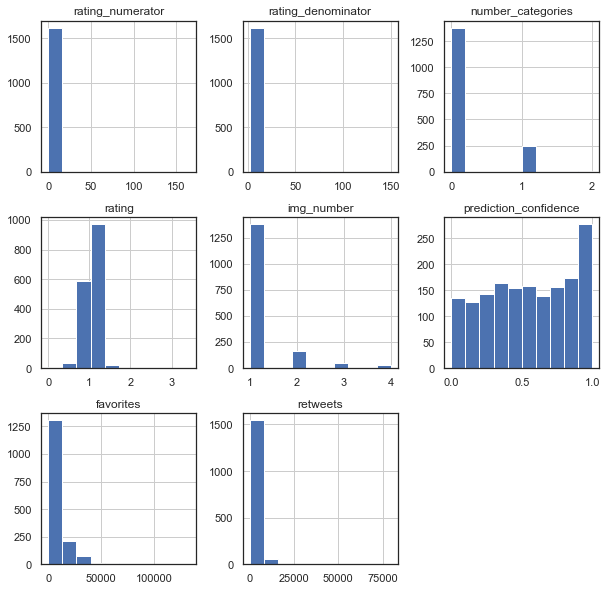

In [90]:
# Histogram
df.hist(figsize=(10,10));

<a id='insight1'></a>
#### Insight 1
**Most common dog Breed**

An interesting information is the dog breed. This information comes from the image predictions file, which we merged with the tweeter archive at Storing section. Dog breeds were generated by running images through the neural network that can classify breeds of dogs.

In [91]:
# viewing the number for each dog's breed 
df['breed_predicted'].value_counts()

Golden Retriever      143
Labrador Retriever    103
Pembroke              94 
Chihuahua             87 
Pug                   60 
                      .. 
Entlebucher           1  
Silky Terrier         1  
Japanese Spaniel      1  
Clumber               1  
Standard Schnauzer    1  
Name: breed_predicted, Length: 113, dtype: int64

In [92]:
# plotting the horizontal bar chart using function
def plot_barh(x, y, title="", xlabel="", ylabel="", rotation=0):
    
    plt.figure(figsize=(8,5)) 


    bar_list = plt.barh(x,y, color="#3F5D7D", edgecolor="k")


    plt.title(title,
              fontsize=17)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

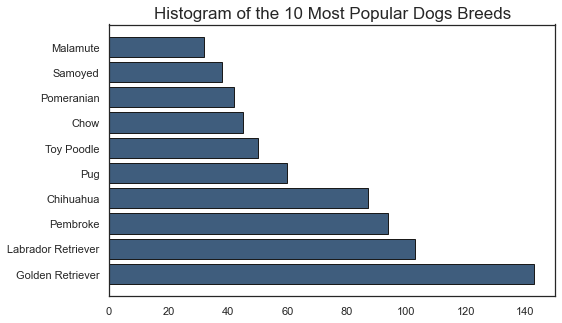

In [93]:
# plotting ten most popular dog breeds
dog_breeds = pd.DataFrame(df.breed_predicted.value_counts()[:10])

plot_barh(dog_breeds.index,
          dog_breeds.breed_predicted,
          title="Histogram of the 10 Most Popular Dogs Breeds")

**Golden Retriever, Labrador Retriever, Pembroke, and Chihuahua are the most popular dog breeds!**

<a id='insight2'></a>
#### Insight 2
**Average rating among dog Breeds**

In [94]:
df_dog_type_mean = df.groupby('breed_predicted').mean()

In [95]:
df_dog_type_mean.head()

,rating_numerator,rating_denominator,number_categories,rating,img_number,prediction_confidence,favorites,retweets
breed_predicted,,,,,,,,
Afghan Hound,8.000000,10.0,0.000000,0.800000,1.000000,0.513621,12191.500000,3602.5000
Airedale,9.833333,10.0,0.083333,0.983333,1.166667,0.583771,5280.833333,1393.7500
American Staffordshire Terrier,10.312500,10.0,0.187500,1.031250,1.187500,0.527359,9380.187500,2310.8125
Appenzeller,11.000000,10.0,0.000000,1.100000,1.000000,0.503665,7317.500000,1458.0000
Australian Terrier,11.500000,10.0,0.000000,1.150000,2.000000,0.307584,11127.500000,3078.5000


In [96]:
df_dog_type_sorted = df_dog_type_mean['rating'].sort_values()

df_dog_type_sorted

breed_predicted
Japanese Spaniel               0.500000
Afghan Hound                   0.800000
Soft-Coated Wheaten Terrier    0.880000
Scotch Terrier                 0.900000
Walker Hound                   0.900000
                                 ...   
Border Terrier                 1.214286
Irish Setter                   1.233333
Briard                         1.233333
Saluki                         1.250000
Bouvier Des Flandres           1.300000
Name: rating, Length: 113, dtype: float64

<a id='insight3'></a>
#### Insight 3
**Account Popularity over Time**

Account Popularity based on the numbers of Favorites and Retweets over time.

No handles with labels found to put in legend.


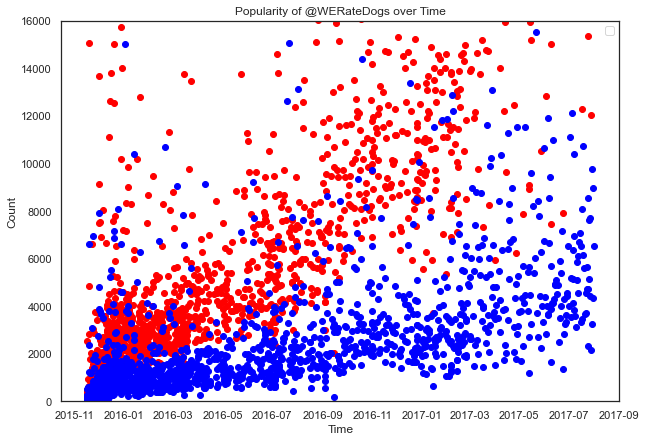

In [97]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#FF0000")
ax.plot_date(d,df.retweets, color="#0000FF")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()

**The page gained popularity over time as it is clear in the above graph.
We see an upward trend in the number of favorites and retweets. We can suppose that tweets were getting more and more favorites and retweets as WeRateDog account was becoming more and more popular.**

(0.0, 83521.15094004545)

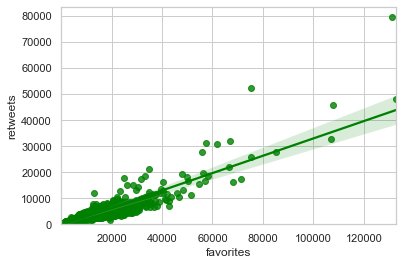

In [98]:
# favorites as potential predictor variable of retweets
# setting up the graph layout and design
sns.set_style("whitegrid")
sns.regplot(x="favorites", y="retweets", color="green", data=df)
plt.ylim(0,)

<a id='insight4'></a>
#### Insight 4
**Dog Types**

WeRateDogs classifies dogs into one of four stages: doggo, pupper, puppo, and floof(er).Let's check how many dogs we have for each category.

In [99]:
df.dog_type.value_counts()

Pupper     184
Doggo      62 
Puppo      25 
Floofer    8  
Name: dog_type, dtype: int64

In [100]:
# plotting bar chart using function
def plot_bar(x, y, title="", xlabel="", ylabel="", rotation=0, width=0.8):
    
    plt.figure(figsize=(9,6)) 

    bar_list = plt.bar(x, y, color="#173c8c", edgecolor="k", width=width)


    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=15)
    
    plt.ylabel(ylabel,
               fontsize=15)

    return plt.show()

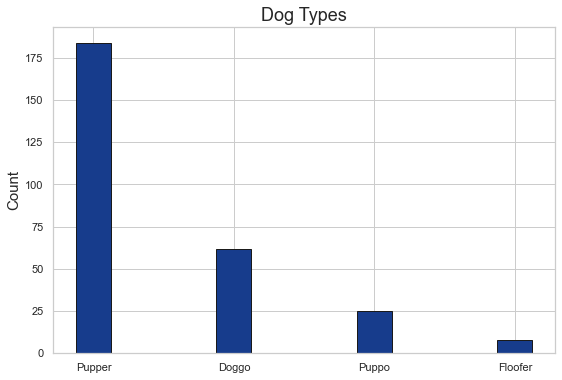

In [101]:
# plot dog types
dog_types = pd.DataFrame(df.dog_type.value_counts())

plot_bar(dog_types.index,
         dog_types.dog_type,
         width=0.25,
         title="Dog Types",
         ylabel="Count")


sns.set_style('darkgrid')

**Pupper is the most common dog category, followed by Doggo. Floofer is very rare.**

<a id='insight5'></a>
#### Insight 5
WeRateDogs rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc.

In [102]:
# statistical summary of rating
df.rating.describe()

count    1626.000000
mean     1.081431   
std      0.187995   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      3.428571   
Name: rating, dtype: float64

In [103]:
# line plot function
def plot_line(x, y, title="", xlabel="", ylabel="", marker=None, linestyle="-", xlim=None, ylim=None, xrotation=0):
    
    plt.figure(figsize=(10, 7))   

    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.grid(which='major', axis='both', linestyle='--', alpha=0.5, color="#9b2e2e")

    plt.yticks(fontsize=14)    
    plt.xticks(fontsize=14, rotation=xrotation)   

    if xlim is None:
        plt.xlim()
    else:
        plt.xlim(xlim)

    if ylim is None:
        plt.ylim()
    else:
        plt.ylim(ylim)
    
    plt.plot(x, y, marker=marker, linestyle=linestyle, color="#FF0000")

    plt.title(title,
              fontsize=18)
    
    plt.xlabel(xlabel,
               fontsize=14)
    
    plt.ylabel(ylabel,
               fontsize=14)

    return plt.show()

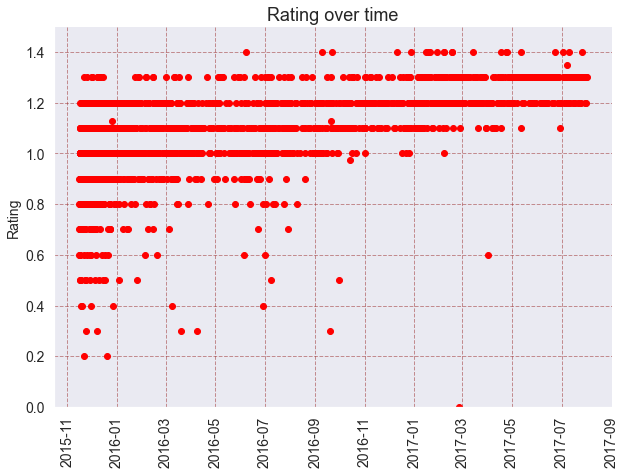

In [104]:
# plotting rating over time
plot_line(df.timestamp, 
          df.rating,
          title="Rating over time", 
          ylabel="Rating", 
          marker='o', 
          linestyle='', 
          ylim=(0,1.5), 
          xrotation=90)
sns.set_style('darkgrid')

**At the beginning of the account activity, the lower ratings were more frequent.**                 

**With the elapse of time, less and less dogs received a low rating, and more and more high.**

## Further Investigation of the Data

Aim : The goal here is to understand what influences the sharing.

###  Inspecting the Global information on sharing

In [105]:
# getting the Description of retweet variable
df['retweets'].describe()

count    1626.000000 
mean     2555.534440 
std      4301.337243 
min      16.000000   
25%      622.250000  
50%      1363.000000 
75%      2992.500000 
max      79515.000000
Name: retweets, dtype: float64

In [106]:
# looking up the record with the miminum retweet 
for ind, rw in df.iterrows():
    if rw['retweets']==13:
        print ('index: ',ind,'\n','\n',
               rw,'\n','\n',
              )

In [107]:
# looking up the row with the maximum retweet 
for ind, rw in df.iterrows():
    if rw['retweets']==77996:
        print ('index: ',ind,'\n','\n',
               rw,'\n','\n',
              )

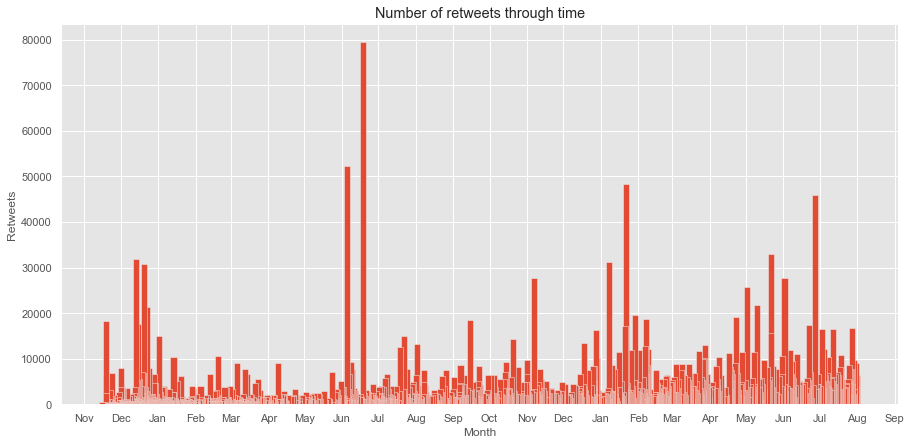

In [108]:
# getting the evolution of tweet sharing 
df_plot=df.copy()

# setting up the date as index
df_plot.set_index('timestamp',inplace=True)

# setting up the plot style to 'ggplot'
plt.style.use('ggplot')

# plotting the data
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(df_plot.index, df_plot['retweets'],width=5)


# setting up the ticks for each week
ax.xaxis.set_major_locator(mdates.MonthLocator())

# setting the format for major ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

# setting up the axis and graph titles
ax.set_title('Number of retweets through time')
ax.set_xlabel('Month')
ax.set_ylabel('Retweets')


# generating the figure
fig.savefig('data/retweets_through_time.png')

###  Visualizing the Variables

Skimming away the Outliers

In [109]:
# defining the function to remove the outliers
def discard_outliers(dataframe, column):
    '''
    the function take a dataframe and a column as argument 
    cut the outlier of the dataframe
    and return the new dataframe shape
    '''
    q3 = dataframe[column].quantile(0.75)
    q1 = dataframe[column].quantile(0.25)
    IQR = q3 - q1
    out_1 = q1 - 1.5*IQR
    out_2 = q3 + 1.5*IQR
    dataframe = dataframe.loc[((dataframe[column] > out_1) & (dataframe[column] < out_2))]
    return dataframe

In [110]:
# applying function to our dataframe
df = discard_outliers(df,'retweets')

In [111]:
# making sure the changes of the structure of retweets
df.shape

(1503, 16)

#### Description of Data without the Outliers

In [112]:
# statistical summary of retweets
df['retweets'].describe()

count    1503.000000
mean     1714.437126
std      1480.792429
min      16.000000  
25%      593.500000 
50%      1234.000000
75%      2475.000000
max      6547.000000
Name: retweets, dtype: float64

#### Visualizing Hours Vs Retweets

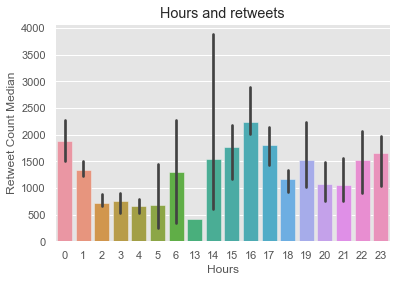

In [113]:
# generating a copy of the dataframe
df_hr = df.copy()


# generating a new fields "Hours"
df_hr['hour'] = df_hr['timestamp'].apply(lambda x: x.hour)

# generating a graphical plot for the data
g=sns.barplot( x="hour", y="retweets", data=df_hr,estimator=median)
g.set_xlabel('Hours')

# setting the appropriate headers
plt.title('Hours and retweets')
plt.ylabel('Retweet Count Median')

# exporting the figure
fig =g.get_figure()
fig.savefig('data/hours_and_retweets.png')

#### Visualizing Days Vs Retweets

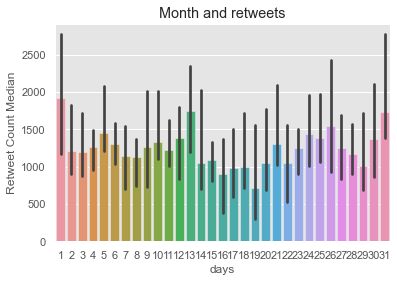

In [114]:
# generating a copy of the dataframe
df_day = df.copy()

# generating a new fields "day"
df_day['day'] = df_day['timestamp'].apply(lambda x: x.day)

# generating a graphical plot for the data
g=sns.barplot( x="day", y="retweets", data=df_day,estimator=median)
g.set_xlabel('days')

# setting the appropriate headers
plt.title('Month and retweets')
plt.ylabel('Retweet Count Median')

# exporting the figure
fig =g.get_figure()
fig.savefig('data/month_and_retweets.png')

#### Visualizing Weekdays Vs Retweets

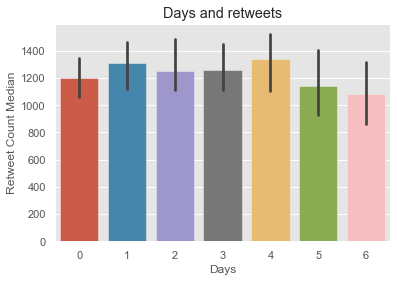

In [115]:
# generating a copy of the dataframe
df_weekday = df.copy()

# generating a new field "weekday"
df_weekday['weekday'] = df_weekday['timestamp'].apply(lambda x: x.weekday())

# generating a graphical plot for the data
g=sns.barplot( x="weekday", y="retweets", data=df_weekday,estimator=median)
g.set_xlabel('Days')

# setting the appropriate headers
plt.title('Days and retweets')
plt.ylabel('Retweet Count Median')

# exporting the figure
fig =g.get_figure()
fig.savefig('data/days_and_retweets.png')

#### Visualizing Dog Breeds Vs Retweets

In [116]:
# generating a copy of the dataframe
df_breeds = df.copy()

# fetching the count of unique breeds
print('Unique Breeds of Dogs are : ', df_breeds['breed_predicted'].nunique())

# calculating the frequency of various breeds
df['breed_predicted'].value_counts()
frequency = df['breed_predicted'].value_counts().to_dict()
f= pd.DataFrame(list(frequency.items()), columns=['breed', 'frequency'])

# filtering the Data for frequencies > 23 only
f.drop(f[f.frequency < 23].index, inplace=True)

Unique Breeds of Dogs are :  113


In [117]:
# generating a new field "total_retweet"
total_retweet =[]
for i in f['breed']:
    t_r = df[df['breed_predicted'] == i]['retweets'].sum()
    total_retweet.append(t_r)

f['total_retweet']=total_retweet
f.head()

,breed,frequency,total_retweet
0,Golden Retriever,124,255323
1,Labrador Retriever,94,192052
2,Pembroke,82,173160
3,Chihuahua,80,106989
4,Pug,57,79586


In [118]:
# generating a new field "retweet_mean"
f['retweets']=f['total_retweet']//f['frequency']
f.head()

,breed,frequency,total_retweet,retweets
0,Golden Retriever,124,255323,2059
1,Labrador Retriever,94,192052,2043
2,Pembroke,82,173160,2111
3,Chihuahua,80,106989,1337
4,Pug,57,79586,1396


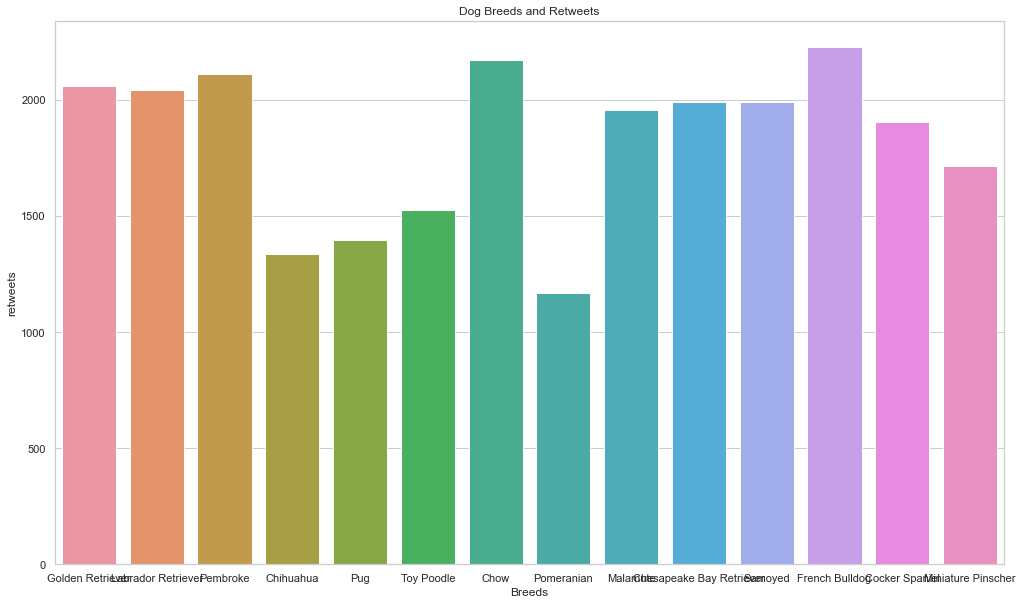

In [119]:
# generating a graphical plot for the data
sns.set(rc={'figure.figsize':(17,10)})

# setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="breed", y="retweets", data=f)
g.set_ylabel('retweets')

# setting the appropriate headers
plt.title('Dog Breeds and Retweets')
plt.xlabel('Breeds')

# exporting the figure
fig =g.get_figure()
fig.savefig('data/breeds_and_retweets.png')

#### Visualizing Rating Vs Retweets

In [120]:
# generating a copy of the dataframe
df_rating = df.copy()

In [121]:
# calculating the rating proportion
df_rating['rating']=df_rating['rating_numerator']/df_rating['rating_denominator']

In [122]:
# generating a df with rating and frequency
df_rating['rating'].value_counts()
frequency = df_rating['rating'].value_counts().to_dict()
f = pd.DataFrame(list(frequency.items()), columns=['rating', 'frequency'])
f.head()

,rating,frequency
0,1.2,374
1,1.0,346
2,1.1,336
3,1.3,157
4,0.9,132


In [123]:
# calculating the totals for Retweet
total_retweet =[]
for i in f['rating']:
    t_r = df_rating[df_rating['rating'] == i]['retweets'].sum()
    total_retweet.append(t_r)

f['total_retweet']=total_retweet
f.head()

# calculating the mean for Retweets
f['retweets']=f['total_retweet']//f['frequency']
f.head()

,rating,frequency,total_retweet,retweets
0,1.2,374,865757,2314
1,1.0,346,384751,1111
2,1.1,336,537793,1600
3,1.3,157,506977,3229
4,0.9,132,106195,804


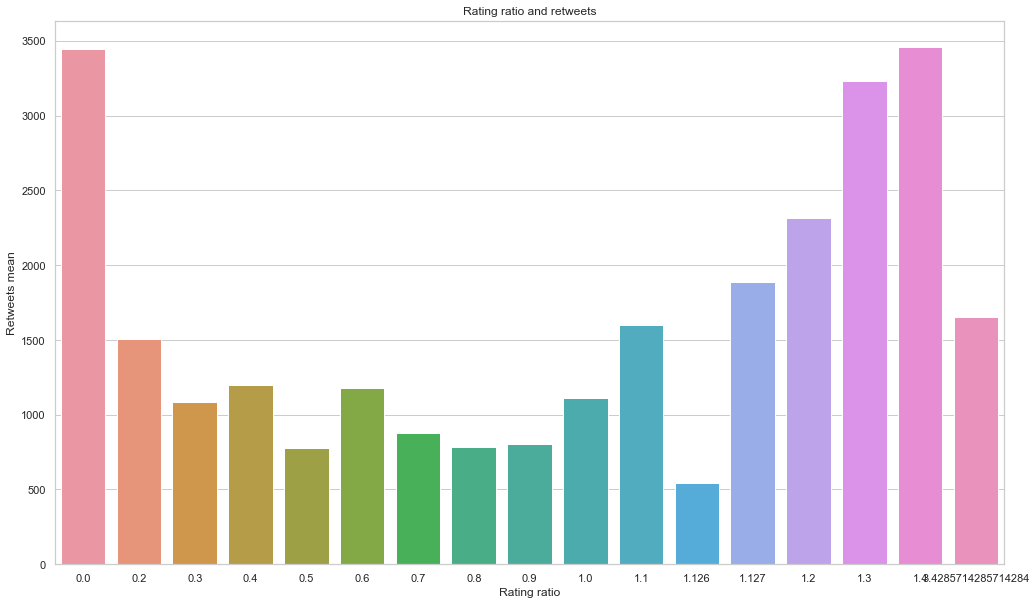

In [124]:
# generating a graphical plot for the data
sns.set(rc={'figure.figsize':(17,10)})

# setting up the graph layout and design
sns.set_style("whitegrid")
g = sns.barplot(x="rating", y="retweets", data=f)
g.set_ylabel('Retweets mean')

# setting the appropriate headers
plt.title('Rating ratio and retweets')
plt.xlabel('Rating ratio')

# exporting the figure
fig =g.get_figure()
fig.savefig('data/rating_and_retweets.png')

(0.0, 8031.118940295347)

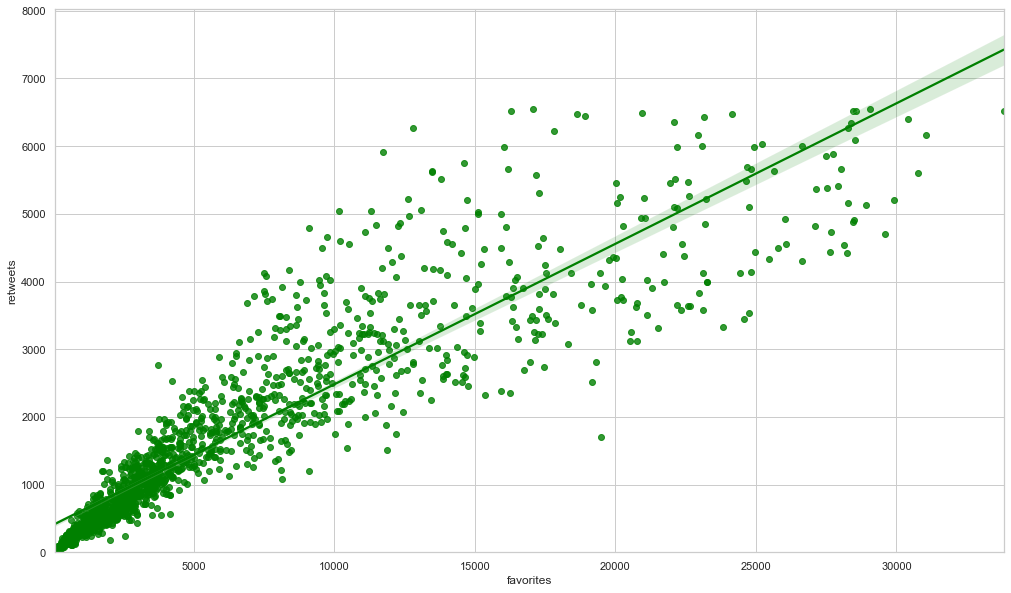

In [125]:
# favorites as potential predictor variable of retweets
# setting up the graph layout and design
sns.set_style("whitegrid")
sns.regplot(x="favorites", y="retweets", color="green", data=df)
plt.ylim(0,)